<a id='start'></a>
# Regressione lineare Esercizi

In questo notebook vengono presentati degli esercizi sulla regressione lineare. <br>
Provate a svolgere i seguenti esercizi: <br>
1) [Regressione semplice](#section1)<br>
2) [Prezzi case](#section2)<br>
3) [Regressione multipla](#section3)
3) [Regressione multipla SerieA](#section4)

<a id='section1'></a>
## Regressione semplice

Provare ad effettuare un'analisi di regressione su questi dati:

<img src="img/python-linear-regression.png">

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [18]:
data = pd.DataFrame({'y': [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]})
data

,y
0,1
1,3
2,2
3,5
4,7
5,8
6,8
7,9
8,10
9,12


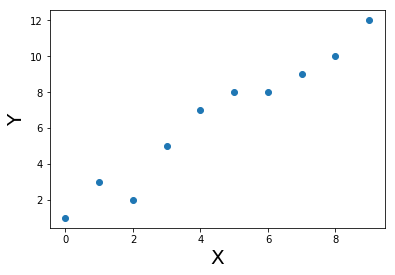

In [19]:
y = data['y']
x1 = data.index

plt.scatter(x1, y)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.show()

In [34]:
x = sm.add_constant(x1)
model = sm.OLS(y, x).fit()

y_pred = model.predict(x)
print("R2 model: %f" % r2_score(y, y_pred))

model.summary()

R2 model: 0.744739


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           8.13e-31
Time:                        23:21:01   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

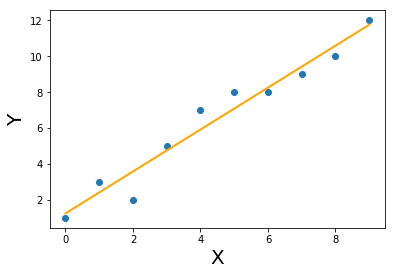

In [24]:
yhat = x1 * model.params['x1'] + model.params['const']
plt.scatter(x1, y)
plt.plot(x1, yhat, lw=2, c='orange')
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.show()

<a id='section2'></a>
## Prezzi case

Hai un dataset coi pressi delle case.

I dati sono salvati nel file: 'real_estate_price_size.csv'. 

Devi creare una regressione lineare semplice, utilizzando i dati.

In questo esercizio la veriabile dipendente sarà 'price', mentre la variaibli indipendente sarà 'size'.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [4]:
data = pd.read_csv('data/real_estate_price_size.csv')
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [5]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


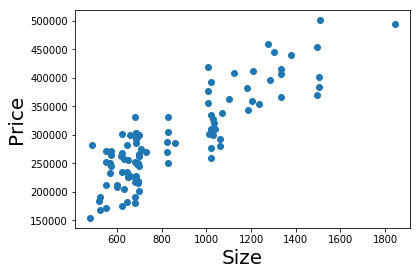

In [6]:
y = data['price']
x1 = data['size']

plt.scatter(x1, y)
plt.xlabel('Size',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x1, y, test_size=0.2)

x = sm.add_constant(X_train)
results = sm.OLS(Y_train, x).fit()

y_pred_train = results.predict(x)
y_pred_test = results.predict(sm.add_constant(X_test))

print("R2 model on training data: %f" % r2_score(Y_train, y_pred_train))
print("R2 model on test data: %f" % r2_score(Y_test, y_pred_test))

results.summary()

R2 model on training data: 0.735935
R2 model on test data: 0.772564


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     217.4
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           2.92e-24
Time:                        14:50:17   Log-Likelihood:                -959.64
No. Observations:                  80   AIC:                             1923.
Df Residuals:                      78   BIC:                             1928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.089e+05   1.31e+04      8.282      0.000    8.27e+04    1.35e+05
size         214.9001     14.576     14.744      0.000     185.882     243.918
==============================================================================
Omnibus:                       13.734   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                3.807
Skew:                          -0.006   Prob(JB):                        0.149
Kurtosis:                       1.931   Cond. No.                     2.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

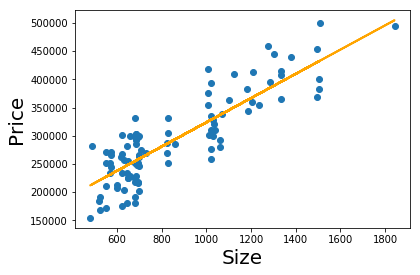

In [12]:
plt.scatter(x1, y)

yhat = x1 * results.params['size'] + results.params['const']
fig = plt.plot(x1, yhat, lw=2, c='orange')

plt.xlabel('Size', fontsize = 20)
plt.ylabel('Price', fontsize = 20)

plt.show()

<a id='section3'></a>
## Regressione multipla

Effettuare una regressione multipla sui dati contenuti nel file 'ex1data2.csv' ce contiene i dati dei prezzi delle case (variabile dipendente) e i dati sul numero di stanze e la dimensione della casa (variabili indipendenti).

In [3]:
import numpy as np

data = pd.read_csv('data/ex1data2.csv')
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


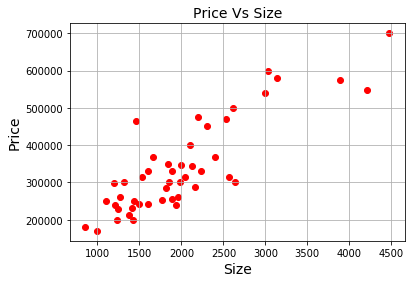

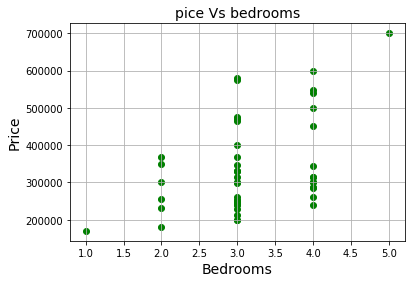

In [4]:
# First correlation
plt.scatter(data['size'], data['price'], color='red')
plt.title('Price Vs Size', fontsize=14)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()
 
# Second correlation
plt.scatter(data['bedrooms'], data['price'], color='green')
plt.title('pice Vs bedrooms', fontsize=14)
plt.xlabel('Bedrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

In [5]:
data[['price','size']].corr()

,price,size
price,1.000000,0.854988
size,0.854988,1.000000


In [6]:
data[['price','bedrooms']].corr()

,price,bedrooms
price,1.000000,0.442261
bedrooms,0.442261,1.000000


In [20]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X = data[['size', 'bedrooms']]
Y = data['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

X_train = sm.add_constant(X_train) # adding a constant
X_test = sm.add_constant(X_test) # adding a constant

model = sm.OLS(Y_train, X_train).fit(normalize=True)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("R2 model on training data: %f" % r2_score(Y_train, Y_train_pred))
print("R2 model on test data: %f" % r2_score(Y_test, Y_test_pred))

R2 model on training data: 0.686619
R2 model on test data: 0.782133


Visualizziamo i dati:

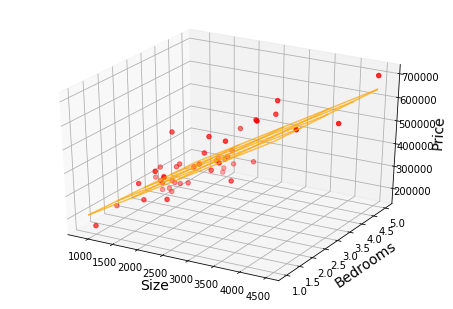

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
plt3d = fig.gca(projection='3d')

ax = Axes3D(fig)
ax.scatter(data['size'], data['bedrooms'], data['price'], color='red')
ax.set_xlabel('Size', fontsize=14)
ax.set_ylabel('Bedrooms', fontsize=14)
ax.set_zlabel('Price', fontsize=14)

x = np.linspace(data['size'].min(), data['size'].max(), 5)
y = np.linspace(data['bedrooms'].min(), data['bedrooms'].max(), 5)
x, y = np.meshgrid(x, y)

z = model.params['const'] + model.params['size'] * x + model.params['bedrooms'] * y
z = z.reshape(x.shape)

ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)

plt.show()

<a id='section4'></a>
## Regressione multipla SerieA

Leggendo i dati della classifica di SerieA provare a impostare un modello per calcolare una regressione multipla tra i gol fatti e subiti e i punti in classifica.

In [22]:
classifica_serie_a = pd.read_html(io="http://www.legaseriea.it/it/serie-a/classifica", skiprows=1, header=0)
dataset = classifica_serie_a[0]
dataset

,SQUADRE,PUNTI,G,V,N,P,G.1,V.1,N.1,P.1,G.2,V.2,N.2,P.2,F,S
0,1 Juventus,75,28,24,3,1,14,12,2,0,14,12,1,1,59,19
1,2 Napoli,60,28,18,6,4,15,11,3,1,13,7,3,3,52,23
2,3 Inter,53,28,16,5,7,13,9,2,2,15,7,3,5,43,24
3,4 Milan,51,28,14,9,5,15,9,3,3,13,5,6,2,43,26
4,5 Roma,47,28,13,8,7,13,8,4,1,15,5,4,6,52,39
5,6 Lazio,45,27,13,6,8,14,8,3,3,13,5,3,5,41,29
6,7 Atalanta,45,28,13,6,9,14,6,4,4,14,7,2,5,57,39
7,8 Torino,44,28,11,11,6,14,8,1,5,14,3,10,1,37,26
8,9 Sampdoria,42,28,12,6,10,13,7,2,4,15,5,4,6,49,38
9,10 Fiorentina,37,28,8,13,7,13,5,6,2,15,3,7,5,43,35


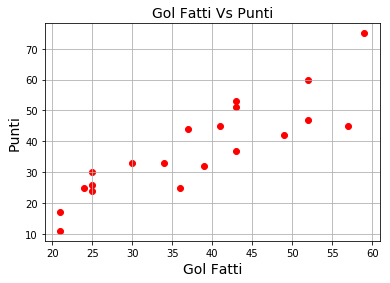

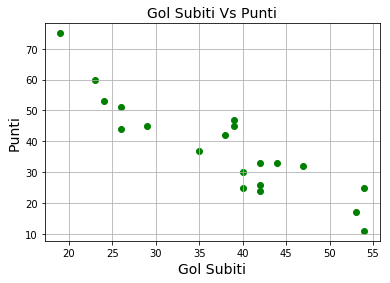

In [23]:
# First correlation
plt.scatter(dataset['F'], dataset['PUNTI'], color='red')
plt.title('Gol Fatti Vs Punti', fontsize=14)
plt.xlabel('Gol Fatti', fontsize=14)
plt.ylabel('Punti', fontsize=14)
plt.grid(True)
plt.show()
 
# Second correlation
plt.scatter(dataset['S'], dataset['PUNTI'], color='green')
plt.title('Gol Subiti Vs Punti', fontsize=14)
plt.xlabel('Gol Subiti', fontsize=14)
plt.ylabel('Punti', fontsize=14)
plt.grid(True)
plt.show()

In [26]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X = dataset[['F', 'S']]
Y = dataset['PUNTI']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

X_train = sm.add_constant(X_train) # adding a constant
X_test = sm.add_constant(X_test) # adding a constant

model = sm.OLS(Y_train, X_train).fit(normalize=True)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("R2 model on training data: %f" % r2_score(Y_train, Y_train_pred))
print("R2 model on test data: %f" % r2_score(Y_test, Y_test_pred))

R2 model on training data: 0.937124
R2 model on test data: 0.951549


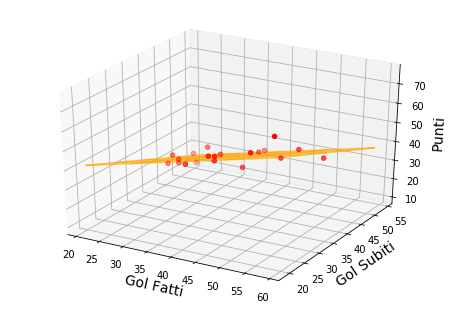

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
plt3d = fig.gca(projection='3d')

ax = Axes3D(fig)
ax.scatter(dataset['F'], dataset['S'], dataset['PUNTI'], color='red')
ax.set_xlabel('Gol Fatti', fontsize=14)
ax.set_ylabel('Gol Subiti', fontsize=14)
ax.set_zlabel('Punti', fontsize=14)

x = np.linspace(dataset['F'].min(), dataset['F'].max(), 5)
y = np.linspace(dataset['S'].min(), dataset['S'].max(), 5)
x, y = np.meshgrid(x, y)

z = model.params['const'] + model.params['F'] * x + model.params['S'] * y
z = z.reshape(x.shape)

ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)

plt.show()